In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
#import datatime as dt
sns.set()

In [107]:
listaSP500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")

In [108]:
List = listaSP500[0]
List['Symbol'] = List['Symbol'].replace('.','-')


In [109]:
#conversion a dataframe lista = listaSP500_df[0]
#descarga de datos por symbol 
EmpresaData = pd.DataFrame() 
for i in List.Symbol: 
    dato_simbol = yf.download(i, start='2000-01-01', end='2021-12-31') 
    dato_simbol['Symbol'] = i  
    EmpresaData = pd.concat([dato_simbol, EmpresaData]) 


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [110]:
EmpresaData.reset_index(inplace=True)

In [111]:
EmpresaData  = EmpresaData.rename(columns={'Adj Close':'Cierre_Ajustado'})

In [112]:
CopyEmpresaData = EmpresaData.copy()

In [131]:
EmpresaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467097 entries, 0 to 2467096
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Date             datetime64[ns]
 1   Open             float64       
 2   High             float64       
 3   Low              float64       
 4   Close            float64       
 5   Cierre_Ajustado  float64       
 6   Volume           float64       
 7   Symbol           object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 150.6+ MB


In [132]:
List.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   SEC filings            503 non-null    object
 3   GICS Sector            503 non-null    object
 4   GICS Sub-Industry      503 non-null    object
 5   Headquarters Location  503 non-null    object
 6   Date first added       458 non-null    object
 7   CIK                    503 non-null    int64 
 8   Founded                503 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.5+ KB


In [133]:
#Se realiza una columna por dias, años, meses
EmpresaData['Day'] =EmpresaData['Date'].dt.day_name() # para acar el dia
EmpresaData['Year']  = pd.DatetimeIndex(EmpresaData['Date']).year # para acar el año
EmpresaData['Mes']  = pd.DatetimeIndex(EmpresaData['Date']).month # para acar el mes
EmpresaData.reset_index(inplace= True, drop=True)
EmpresaData

,Date,Open,High,Low,Close,Cierre_Ajustado,Volume,Symbol,Day,Year,Mes
0,2013-02-01,31.500000,31.740000,30.469999,31.010000,29.067743,66789100.0,ZTS,Friday,2013,2
1,2013-02-04,31.090000,31.990000,30.760000,31.020000,29.077112,7695400.0,ZTS,Monday,2013,2
2,2013-02-05,31.250000,31.980000,30.850000,31.040001,29.095867,5013200.0,ZTS,Tuesday,2013,2
3,2013-02-06,30.980000,31.430000,30.750000,31.030001,29.086493,2126100.0,ZTS,Wednesday,2013,2
4,2013-02-07,31.000000,32.730000,31.000000,32.000000,29.995731,3800800.0,ZTS,Thursday,2013,2
...,...,...,...,...,...,...,...,...,...,...,...
2467092,2021-12-23,172.990005,175.619995,172.779999,174.970001,171.561081,1955700.0,MMM,Thursday,2021,12
2467093,2021-12-27,175.149994,176.729996,174.910004,176.699997,173.257370,1183000.0,MMM,Monday,2021,12
2467094,2021-12-28,176.839996,178.500000,176.750000,177.639999,174.179047,1618900.0,MMM,Tuesday,2021,12
2467095,2021-12-29,177.479996,178.889999,177.229996,178.410004,174.934052,1221900.0,MMM,Wednesday,2021,12


In [134]:
#Validar valore nulos
EmpresaData.isnull().sum()

Date                0
Open               12
High               12
Low                12
Close              12
Cierre_Ajustado    12
Volume             12
Symbol              0
Day                 0
Year                0
Mes                 0
dtype: int64

In [135]:
#Validar valore nulos
List.isnull().sum()

Symbol                    0
Security                  0
SEC filings               0
GICS Sector               0
GICS Sub-Industry         0
Headquarters Location     0
Date first added         45
CIK                       0
Founded                   0
dtype: int64

retornos_gaps = np.log(aperturas/cierres.shift(1)).fillna(0)

retornos_intra = np.log(cierres/aperturas).fillna(0)

variaciones = activo.cierre_ajustado.pct_change()

volatilidad = activos.variaciones.rolling(250).std()100(250)**0.5 (en este caso se puede utilizar el indice VIX)

In [136]:
# Retorno Gaps
EmpresaData['Retorno_Gaps'] = np.log(EmpresaData['Open'] / EmpresaData['Close'].shift(1)).fillna(0)

In [137]:
#Retorno Intra
EmpresaData['Retorno_Intra'] = np.log(EmpresaData['Open'] / EmpresaData['Close']).fillna(0)

In [138]:
# variaciones 
EmpresaData['Variaciones'] = EmpresaData.Cierre_Ajustado.pct_change()

In [139]:
# volatilidad
EmpresaData['Volatilidad'] = EmpresaData.Variaciones.rolling(250).std()*100*(250)**0.5

In [140]:
# copiar Datafrmae por si se requiere el analisis con valores nulos
analisis=EmpresaData.copy()
#EmpresaData[EmpresaData['Retorno_Gaps']==0]

In [141]:
EmpresaData.isnull().sum()

Date                 0
Open                12
High                12
Low                 12
Close               12
Cierre_Ajustado     12
Volume              12
Symbol               0
Day                  0
Year                 0
Mes                  0
Retorno_Gaps         0
Retorno_Intra        0
Variaciones          1
Volatilidad        250
dtype: int64

In [219]:
EmpresasData=EmpresaData.fillna(0)

Cual es el mejor dia para invertir teniendo en cuenta el retorno del movimiento gap

In [221]:
df_Retorno_Gaps = EmpresasData[['Date','Symbol','Retorno_Gaps']].groupby([EmpresasData['Date'].dt.day_name(),EmpresasData['Symbol']]).sum()
df_Retorno_Gaps.reset_index(inplace=True)
df_Retorno_Gaps

,Date,Symbol,Retorno_Gaps
0,Friday,A,-0.274303
1,Friday,AAL,0.600088
2,Friday,AAP,0.443362
3,Friday,AAPL,-0.588972
4,Friday,ABBV,0.329285
...,...,...,...
2495,Wednesday,YUM,-0.449482
2496,Wednesday,ZBH,-0.931358
2497,Wednesday,ZBRA,-0.720191
2498,Wednesday,ZION,-0.002203


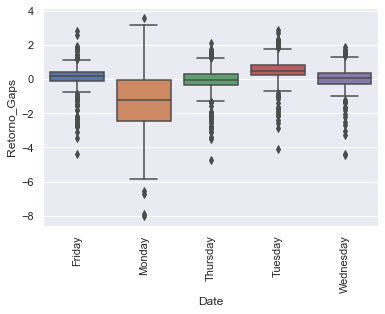

In [222]:
sns.boxplot(data =df_Retorno_Gaps,x='Date',y='Retorno_Gaps')
plt.xticks(rotation=90)
plt.show()

Cual es el mejor dia para invertir teniendo en cuenta el retorno de los movimientos intradiarios

           Date Symbol  Retorno_Intra
0        Friday      A      -0.877030
1        Friday    AAL       1.186309
2        Friday    AAP       0.366954
3        Friday   AAPL       1.262827
4        Friday   ABBV      -0.545081
...         ...    ...            ...
2495  Wednesday    YUM      -1.083374
2496  Wednesday    ZBH      -0.636804
2497  Wednesday   ZBRA      -1.159067
2498  Wednesday   ZION      -0.400570
2499  Wednesday    ZTS       0.024287

[2500 rows x 3 columns]


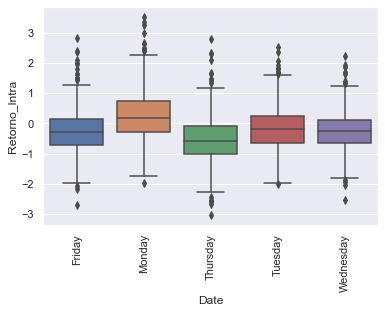

In [223]:
df_Retorno_Intra = EmpresasData[['Date','Symbol','Retorno_Intra']].groupby([EmpresasData['Date'].dt.day_name(),EmpresasData['Symbol']]).sum()
df_Retorno_Intra.reset_index(inplace=True)
print(df_Retorno_Intra)
sns.boxplot(data =df_Retorno_Intra,x='Date',y='Retorno_Intra')
plt.xticks(rotation=90)
plt.show()

Cuales son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir

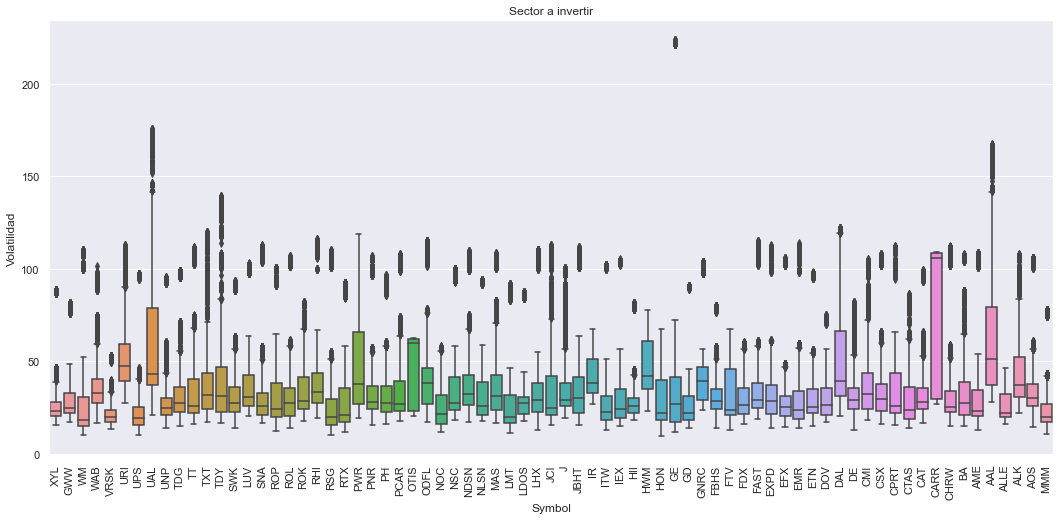

In [224]:
df_Empresa= pd.merge(EmpresasData, List, on=['Symbol'], how='inner')
df_Empresa.drop(['Security','SEC filings','GICS Sub-Industry','Headquarters Location','Founded','CIK', 'Date first added'], axis = 1, inplace = True)
df_mask=df_Empresa['GICS Sector']=='Industrials'
filtered_df = df_Empresa[df_mask]
plt.figure(figsize=(18, 8))
sns.boxplot(data=filtered_df,x='Symbol',y='Volatilidad')

plt.xticks(rotation=90)
plt.title('Sector a invertir')
plt.show()


Cuales fueron los momentos de alta volatilidad que afectaron al SP500

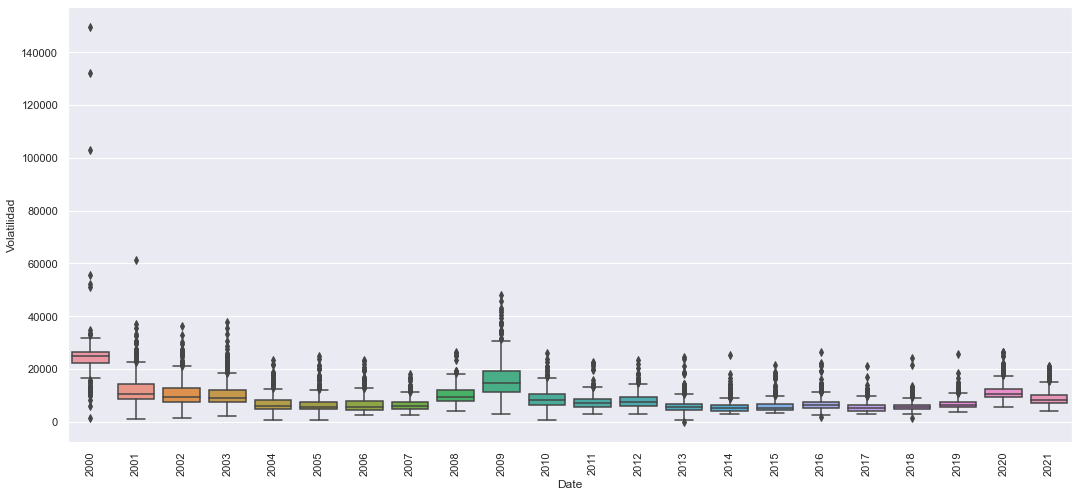

In [225]:
df_volatilidad = df_Empresa[['Date','Symbol','Volatilidad']].groupby([df_Empresa['Date'].dt.year,df_Empresa['Symbol']]).sum()
df_volatilidad.reset_index(inplace=True)
plt.figure(figsize=(18, 8))
sns.boxplot(data =df_volatilidad,x='Date',y='Volatilidad')
plt.xticks(rotation=90)
plt.show()

Cuales son las 9 mejores empresas para invertir

        Symbol  Volatilidad  Mayor_Valor
1936245    ROK    71.133668     1.025112
871864    FAST   102.018840     0.986723
804155     EQR   100.527646     0.980128
1979456   SBUX   101.933564     0.972814
77432      AEE    60.268886     0.965805
1241542    KDP    92.257891     0.951256
2287149    VLO    98.151191     0.948781
1410875   MCHP   101.759974     0.936568
1908214     RF    94.871229     0.932014
380493     CAG    95.175016     0.882394


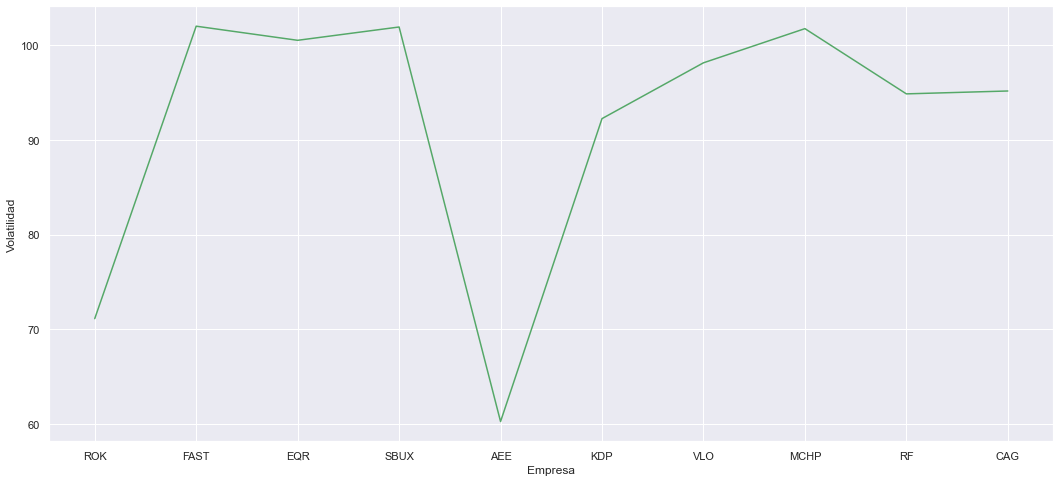

In [228]:
# Crea columna para hallar el mayor valor de la resta entre Gaps y variaciones
EmpresasData['Mayor_Valor'] = EmpresasData['Retorno_Gaps']-EmpresasData['Variaciones']
Mejor_Empresa = EmpresasData[['Symbol','Mayor_Valor']].groupby([ EmpresasData['Symbol'],EmpresasData['Volatilidad']]).sum() #EmpresasData['Symbol'],
# se resetea el indice y se busca por el mayor valor y la volatilidad
Mejor_Empresa.reset_index(inplace=True)
Mejor_Empresa.sort_values(by=['Mayor_Valor','Volatilidad'], inplace=True, ascending=False)
Mejor_Empresa=Mejor_Empresa.head(10)
print(Mejor_Empresa)
#se grafica las empresas versus volatilidad
plt.figure(figsize=(18, 8))
plt.plot(Mejor_Empresa.Symbol, Mejor_Empresa.Volatilidad, "g-")
plt.xlabel('Empresa')
plt.ylabel('Volatilidad')
plt.show()

c:\Users\LENOVO\Documents\Python\prueba\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\LENOVO\Documents\Python\prueba\env\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


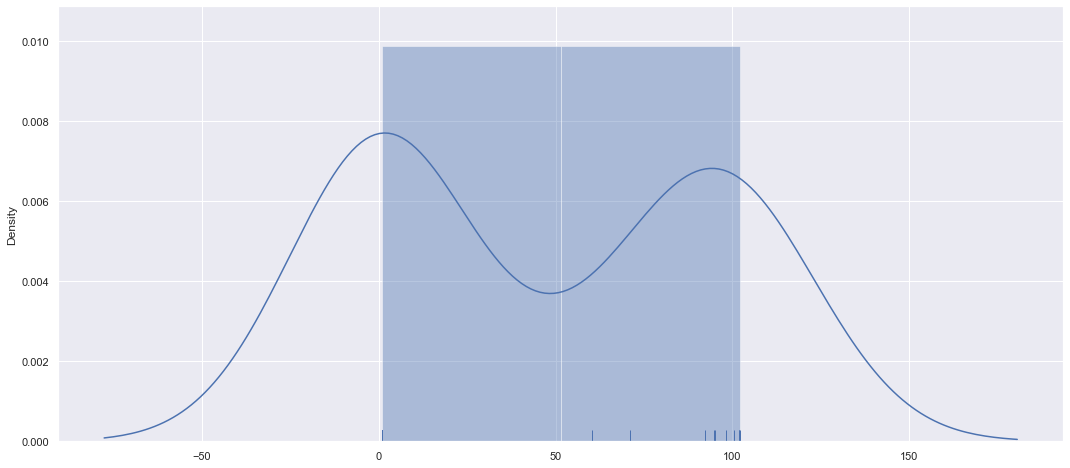

In [229]:
plt.figure(figsize=(18, 8))
sns.distplot([Mejor_Empresa.Volatilidad, Mejor_Empresa.Mayor_Valor], hist=True, kde=True, rug=True)
plt.show()

In [230]:
EmpresasData

,Date,Open,High,Low,Close,Cierre_Ajustado,Volume,Symbol,Day,Year,Mes,Retorno_Gaps,Retorno_Intra,Variaciones,Volatilidad,Mayor_Valor
0,2013-02-01,31.500000,31.740000,30.469999,31.010000,29.067743,66789100.0,ZTS,Friday,2013,2,0.000000,0.015678,0.000000,0.000000,0.000000
1,2013-02-04,31.090000,31.990000,30.760000,31.020000,29.077112,7695400.0,ZTS,Monday,2013,2,0.002576,0.002254,0.000322,0.000000,0.002254
2,2013-02-05,31.250000,31.980000,30.850000,31.040001,29.095867,5013200.0,ZTS,Tuesday,2013,2,0.007387,0.006743,0.000645,0.000000,0.006742
3,2013-02-06,30.980000,31.430000,30.750000,31.030001,29.086493,2126100.0,ZTS,Wednesday,2013,2,-0.001935,-0.001613,-0.000322,0.000000,-0.001613
4,2013-02-07,31.000000,32.730000,31.000000,32.000000,29.995731,3800800.0,ZTS,Thursday,2013,2,-0.000967,-0.031749,0.031260,0.000000,-0.032227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467092,2021-12-23,172.990005,175.619995,172.779999,174.970001,171.561081,1955700.0,MMM,Thursday,2021,12,0.002025,-0.011381,0.013496,18.549140,-0.011471
2467093,2021-12-27,175.149994,176.729996,174.910004,176.699997,173.257370,1183000.0,MMM,Monday,2021,12,0.001028,-0.008811,0.009887,18.567194,-0.008859
2467094,2021-12-28,176.839996,178.500000,176.750000,177.639999,174.179047,1618900.0,MMM,Tuesday,2021,12,0.000792,-0.004514,0.005320,18.573689,-0.004528
2467095,2021-12-29,177.479996,178.889999,177.229996,178.410004,174.934052,1221900.0,MMM,Wednesday,2021,12,-0.000901,-0.005226,0.004335,18.574581,-0.005236


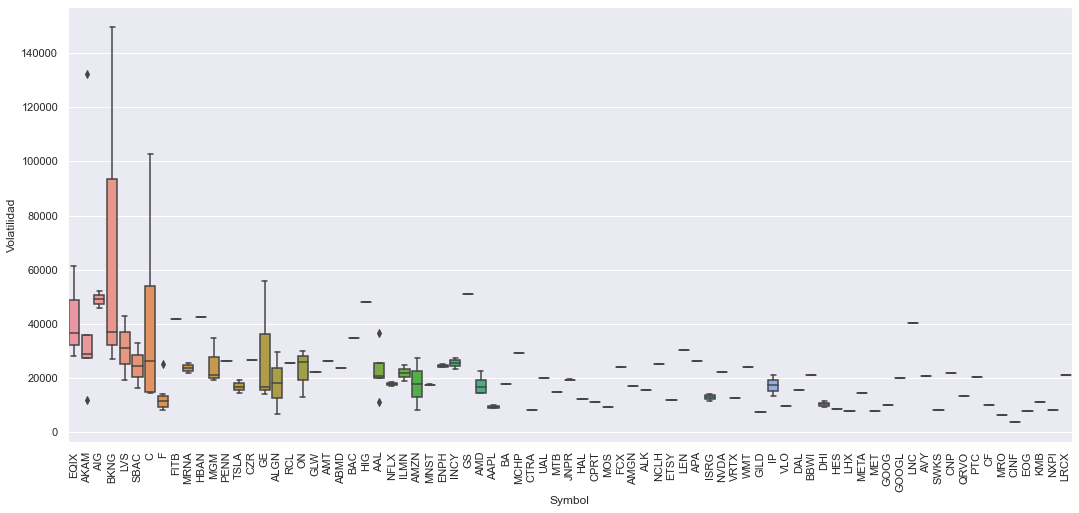

In [289]:
# Crea columna para hallar el mayor valor de la resta entre Gaps y variaciones
EmpresasData['Mayor_Valor'] = EmpresasData['Retorno_Gaps']-EmpresasData['Variaciones']
Mejor_Empresa = EmpresasData[['Date','Symbol','Retorno_Gaps','Volatilidad']].groupby([EmpresasData['Date'].dt.year,EmpresasData['Symbol']]).sum() #EmpresasData['Symbol'],

#  se busca por el mayor valor y la volatilidad
Mejor_Empresa.reset_index(inplace=True)
Mejor_Empresa.sort_values(by=['Retorno_Gaps','Volatilidad'], inplace=True, ascending=False)

df_mask=Mejor_Empresa[Mejor_Empresa['Retorno_Gaps']>0.7]
plt.figure(figsize=(18, 8))
sns.boxplot(data =df_mask,x='Symbol',y='Volatilidad')
plt.xticks(rotation=90)
plt.show()
